In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.DataFrame([['<=30','high','no','fair','no'],
                  ['<=30','high','no','excellent','no'],
                  ['31..40','high','no','fair','yes'],
                  ['>40','medium','no','fair','yes'],
                  ['>40','low','yes','fair','yes'],
                  ['>40','low','yes','excellent','no'],
                  ['31..40','low','yes','excellent','yes'],
                  ['<=30','medium','no','fair','no'],
                  ['<=30','low','yes','fair','yes'],
                  ['<=30','low','yes','fair','yes'],
                   ['>40','medium','yes','fair','yes'],
                   ['<=30','medium','yes','excellent','yes'],
                   ['31..40','medium','no','excellent','yes'],
                   ['31..40','high','yes','fair','yes'],
                   ['>40','medium','no','excellent','no']],
                   columns=['age','income','student','credit_rating','buys_computer'])

In [3]:
data.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
model=DecisionTreeClassifier(criterion='gini')

In [6]:
label_end=['age','income','student','credit_rating','buys_computer']

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label=LabelEncoder()

In [9]:
for i in label_end:
    data[i]=label.fit_transform(data[i])
data

,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,1,1,1,1,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('buys_computer',axis=1),data['buys_computer'],test_size=0.25)

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
pred=model.predict(X_test)
pred

array([1, 1, 1, 1])

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
confusion_matrix(pred,y_test)

array([[4]], dtype=int64)

In [16]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [17]:
print(model.get_depth())

4


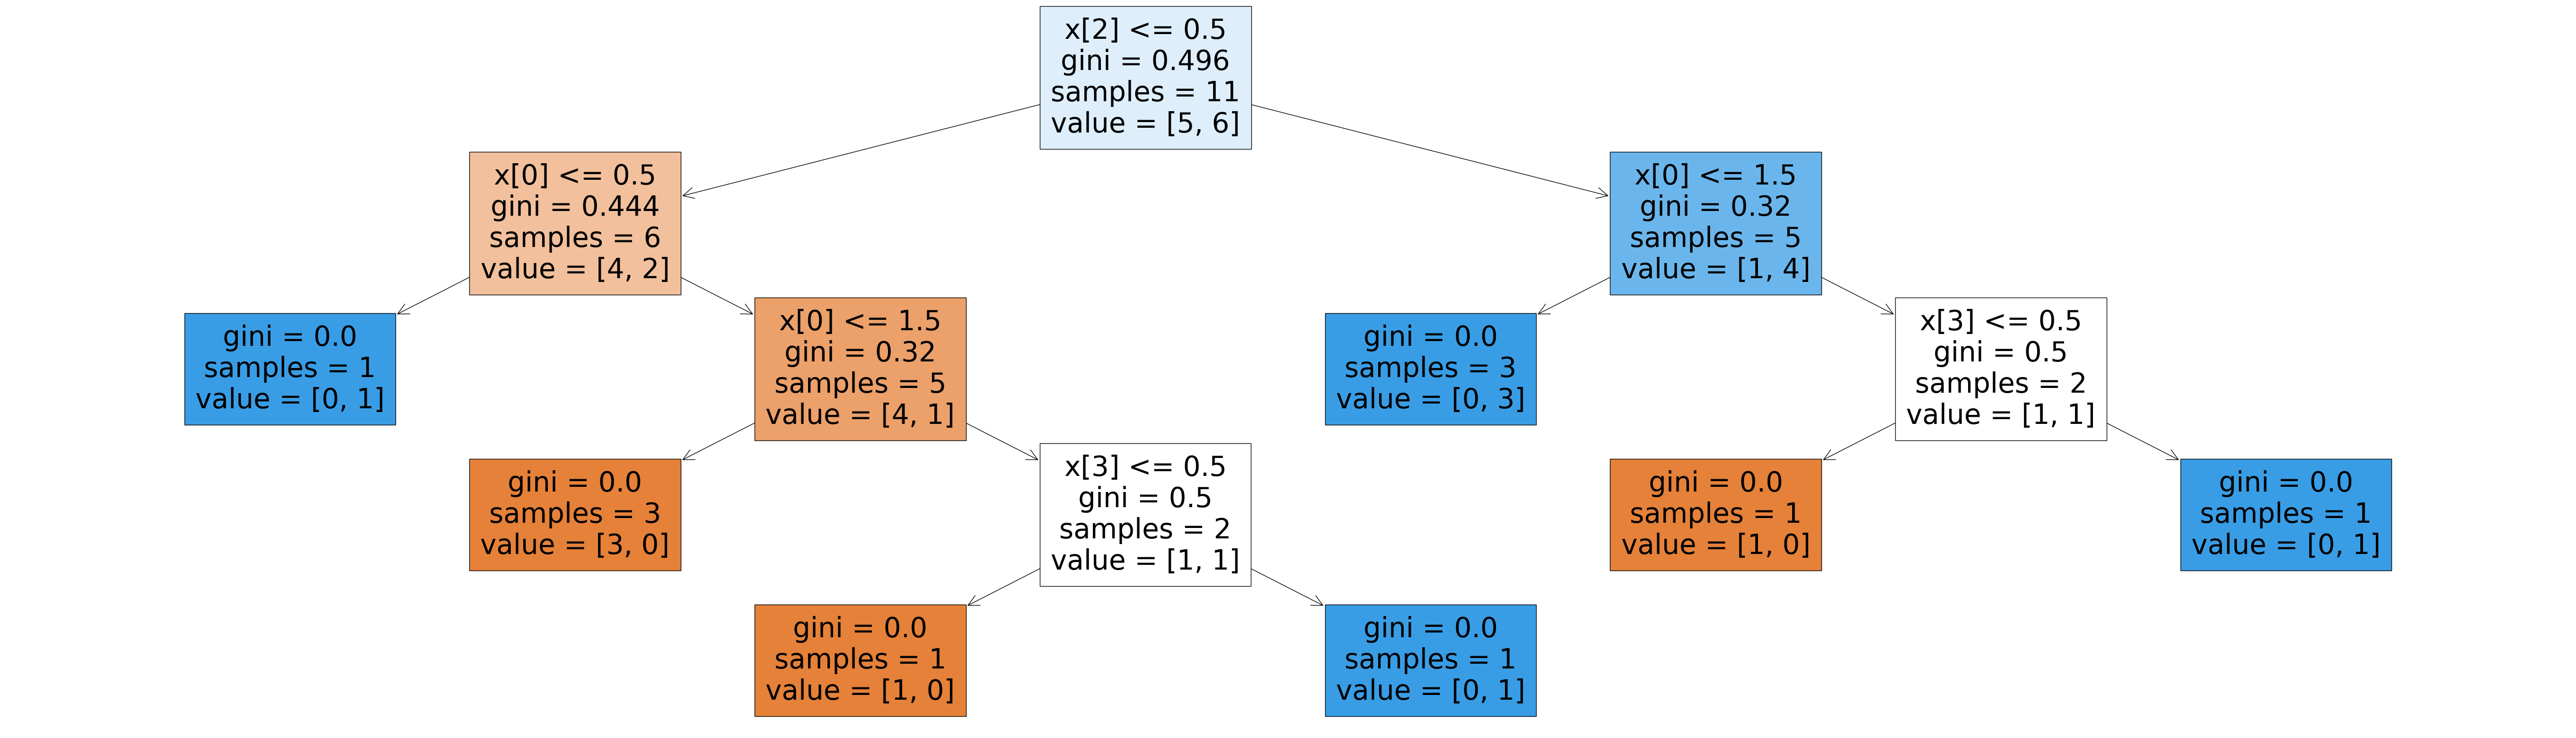

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(model,filled=True)
plt.show()